# Homework 3: Hyperparameter Tuning with SVMs

The final deliverable for this homework will be this Jupyter notebook, which should include all relevant code, markdown cells before each code block describing what the code does, and any write-ups/images/plots that you wish to include.

To add a block click on `Insert > Insert Cell Below`. To make a markdown cell, click the drop-down menu at the top of this page and select `Markdown`. 

The starter code for this homework is purposely very minimal. You should get used to coding from scratch. Just follow all the instructions in the PDF you will be fine.

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.stats import zscore

import matplotlib.pyplot as plt

## 2.3 Grid Search

Here I will be finding the optimal pair of $(C, d)$ for an SVM model where $C$ is the hyperparameter which determines the amount with which we penalize misclassified points and $d$ is the degree of the polynomial, that gives the
best results on a test set.

### 2.3.1 Specifications

First let's read in the data and normalize all the data points.

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', 
                 names=['ID', 'radius', 'texture', 'perimeter', 
                        'area', 'smoothness', 'compactness', 'concativity', 
                        'concave points', 'symmetry', 'label'])
df

,ID,radius,texture,perimeter,area,smoothness,compactness,concativity,concave points,symmetry,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [10]:
normalized_df = df.apply(zscore)
for i in range(df.shape[0]):
    if normalized_df['label'][i] < 0:
        normalized_df['label'][i] = 0
    else:
        normalized_df['label'][i] = 1
normalized_df

,ID,radius,texture,perimeter,area,smoothness,compactness,concativity,concave points,symmetry,label
0,-0.123664,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400,0.0
1,-0.118956,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.348400,0.0
2,-0.098833,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.348400,0.0
3,-0.097459,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.348400,0.0
4,-0.096256,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400,0.0
5,-0.096097,1.262227,2.236180,2.271896,1.806080,1.695166,1.772867,2.269251,1.354008,-0.348400,1.0
6,-0.094521,-1.221191,-0.702212,-0.741774,-0.639366,-0.555608,1.772867,-0.181827,-0.612927,-0.348400,0.0
7,-0.093777,-0.866417,-0.702212,-0.406921,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400,0.0
8,-0.070369,-0.866417,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.998853,-0.612927,1.961862,0.0
9,-0.070369,-0.156869,-0.375724,-0.741774,-0.639366,-0.555608,-0.698853,-0.590340,-0.612927,-0.348400,0.0


Now let's split our data into a testing and training set.

In [13]:
C = [.0001, .001, .01, .1, 1, 10, 100]
d = [1, 2, 3, 4, 5]
train_set, test_set = train_test_split(normalized_df, test_size = .3)

Now let's test to see which pair of $(C, d)$ will yield the highest accuracy.

In [14]:
row, col = len(d), len(C);
accuracies = [[0 for c in range(col)] for r in range(row)] 
for i in range(row):
    for j in range(col):
        svc = SVC(C=C[j], degree=d[i], probability=True)
        svc.fit(train_set[['radius', 'texture', 'perimeter', 'area', 
                           'smoothness', 'compactness', 'concativity', 
                           'concave points', 'symmetry']],
                train_set['label'])
        score = svc.score(test_set[['radius', 'texture', 'perimeter', 'area', 
                                    'smoothness', 'compactness', 'concativity', 
                                    'concave points', 'symmetry']], 
                          test_set['label'])
        accuracies[i][j] = score
accuracies
array = np.array(accuracies)
array

array([[ 0.62926829,  0.62926829,  0.95609756,  0.97073171,  0.97560976,
         0.96585366,  0.95609756],
       [ 0.62926829,  0.62926829,  0.95609756,  0.97073171,  0.97560976,
         0.96585366,  0.95609756],
       [ 0.62926829,  0.62926829,  0.95609756,  0.97073171,  0.97560976,
         0.96585366,  0.95609756],
       [ 0.62926829,  0.62926829,  0.95609756,  0.97073171,  0.97560976,
         0.96585366,  0.95609756],
       [ 0.62926829,  0.62926829,  0.95609756,  0.97073171,  0.97560976,
         0.96585366,  0.95609756]])

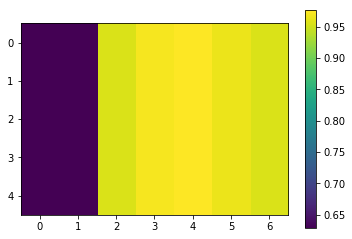

In [15]:
plt.imshow(array)
plt.colorbar()
plt.show()

In [16]:
best = 0
best_C = 0
best_d = 0
for i in range(row):
    for j in range(col):
        if accuracies[i][j] > best:
            best = accuracies[i][j]
            best_C = C[j]
            best_d = d[i]
print(best, best_C, best_d)

0.975609756098 1 1


## 2.4 Cross Validation Search
Use cross validated grid search to find the best combination of and C on the breast cancer dataset.

### 2.4.1 Specifications
Using $C = \{.0001, .001, .01, .1, 1, 10, 100\}$ and $\gamma = \{.0001, .001, .01, .1, 1, 10\}$ for gridsearch, we wil report the best accuracy and which parameters gave the best accuracy.

In [20]:
def svc_param_selection(X, y, nfolds):
    Cs = [.001, .01, .1, 1, 10, 100, 1000]
    gammas = [.001, .01, .1, 1, 10, 100]
    param_grid = {'C':Cs, 'gamma':gammas}
    search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    search.fit(X, y)
    search.best_params_
    return search.best_params_, search.best_score_

svc_param_selection(normalized_df[['radius', 'texture', 'perimeter', 
                                   'area', 'smoothness', 'compactness', 
                                   'concativity', 'concave points', 'symmetry']], 
                    normalized_df['label'], 5)

({'C': 1, 'gamma': 0.01}, 0.97071742313323572)